# SP500 Autocallable Early Redemption Probability Project

## Project Overview
This project aims to estimate the early redemption probability of a single-asset autocallable linked to the S&P500 index. The goal is to build a machine learning model to predict whether the autocall will trigger on its observation dates, based on historical market data and path-dependent features.

---

## Product Specifications

| Feature | Description |
|---------|-------------|
| Underlying | S&P500 Index (^GSPC) |
| Maturity | 3 years |
| Observation Frequency | Annual (1 observation per year) |
| Autocall Trigger | 100% of initial spot (S0) |
| Coupon | 5% per year if autocall not triggered |
| Knock-In Barrier | 60% of initial spot (S0) |
| Path Dependence | Payoff depends on historical minimum and drawdowns |
| Payoff at Maturity | <ul><li>If spot ≥ barrier: principal + accrued coupons</li><li>If spot < barrier: partial loss proportional to spot decline</li></ul> |

---

## Key Features for ML Model
The following features will be used to train the model to predict early redemption:

### Spot / Level Features
- Spot / Strike ratio
- Spot / Barrier ratio
- Time to maturity
- Time to next observation date

### Volatility Features
- 20-day historical volatility
- 50-day historical volatility
- VIX level (market fear index)

### Trend / Momentum Features
- Rolling returns (5d, 20d)
- Moving averages (20d, 50d)
- Maximum drawdown over last period

### Path-Dependent Features
- Minimum SP500 level since last observation
- Cumulative returns since issuance
- Maximum drawdown since issuance

---

## Objective
- Build a baseline ML model (logistic regression) to predict the probability that the autocall triggers at each observation date.  
- Later extensions may include tree-based models or neural networks to better capture nonlinearities in path-dependent payoffs.

---

## Data Sources
- S&P500 historical prices: Yahoo Finance (`^GSPC`)  
- VIX historical values: Yahoo Finance (`^VIX`)  
- Optional macro/interest rate data: FRED  

---

## Methodology
1. Simulate or collect historical SP500 data for the autocall period.  
2. Compute all relevant features for each observation date.  
3. Label each observation: `1` if autocall triggers, `0` otherwise.  
4. Train logistic regression (or other ML models) to estimate early redemption probability.  
5. Evaluate model performance (accuracy, ROC-AUC) and interpret feature importance.  

---

## Notes
- This project focuses on quantitative analysis of early redemption for structured products.  
- Path-dependent features are crucial because autocallables are sensitive to historical spot behavior, not just the final price.  

# Data & Features

In [84]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sp500 = yf.download('^GSPC', '2000-01-01', '2025-01-01')
ma_20 = sp500['Close'].rolling(20).mean()
ma_50 = sp500['Close'].rolling(50).mean()
ma_200 = sp500['Close'].rolling(200).mean()
ret_20 = sp500['Close'].pct_change(20)
drawdown = (sp500['Close'] / sp500['Close'].cummax()) - 1

/var/folders/5s/_mm2kbzx0hb04_mrx65lzgbr0000gn/T/ipykernel_6491/174341460.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download('^GSPC', '2000-01-01', '2025-01-01')
[*********************100%***********************]  1 of 1 completed


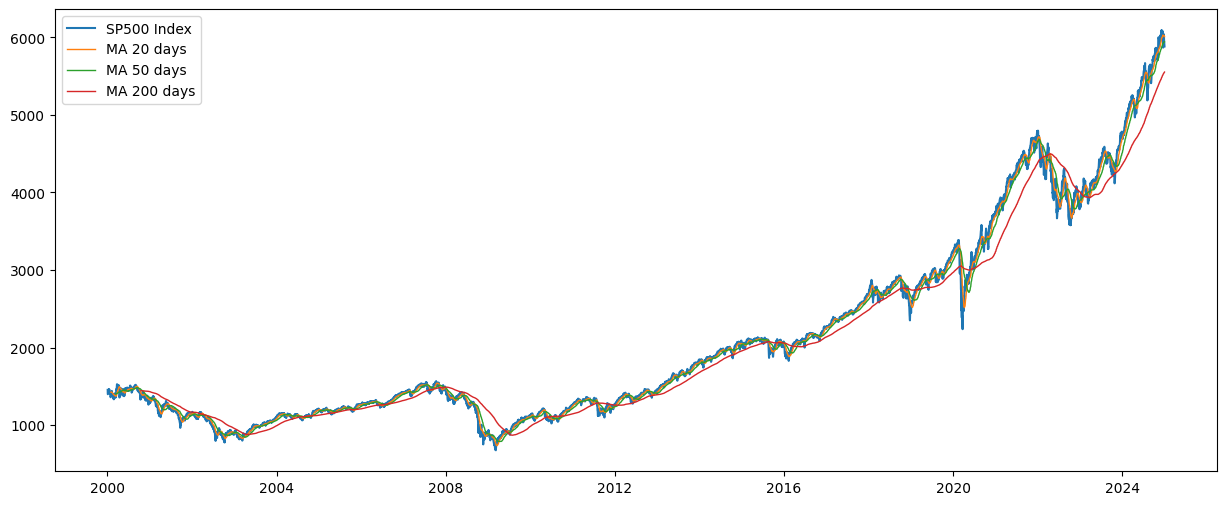

In [85]:
plt.figure(figsize=(15,6))
plt.plot(sp500['Close'], label='SP500 Index')
plt.plot(ma_20, lw=1, label='MA 20 days')
plt.plot(ma_50, lw=1, label='MA 50 days')
plt.plot(ma_200, lw=1, label='MA 200 days')
plt.legend()

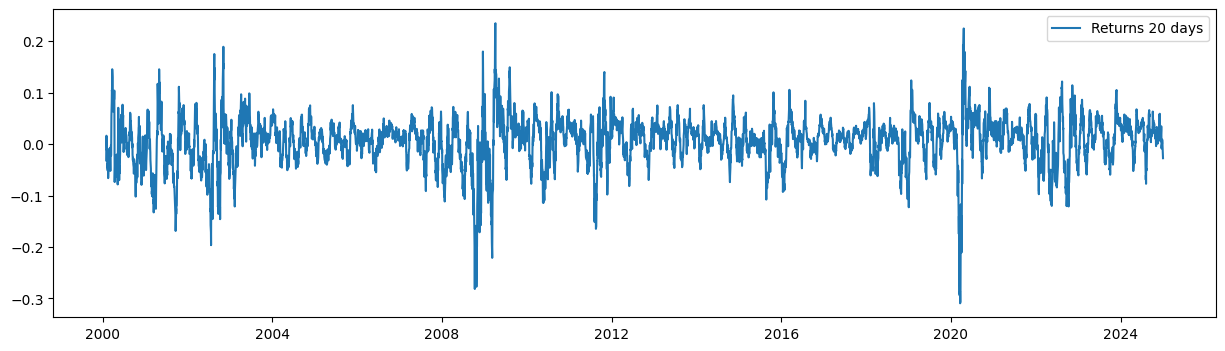

In [86]:
plt.figure(figsize=(15,4))
plt.plot(ret_20, label='Returns 20 days')
plt.legend()

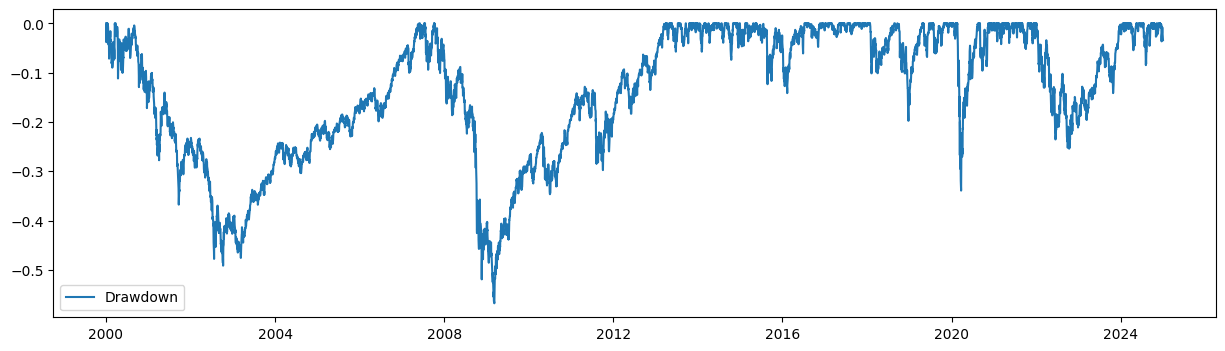

In [87]:
plt.figure(figsize=(15,4))
plt.plot(drawdown, label='Drawdown')
plt.legend()

/var/folders/5s/_mm2kbzx0hb04_mrx65lzgbr0000gn/T/ipykernel_6491/3609692355.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  vix = yf.download('^VIX', '2000-01-01', '2025-01-01')
[*********************100%***********************]  1 of 1 completed


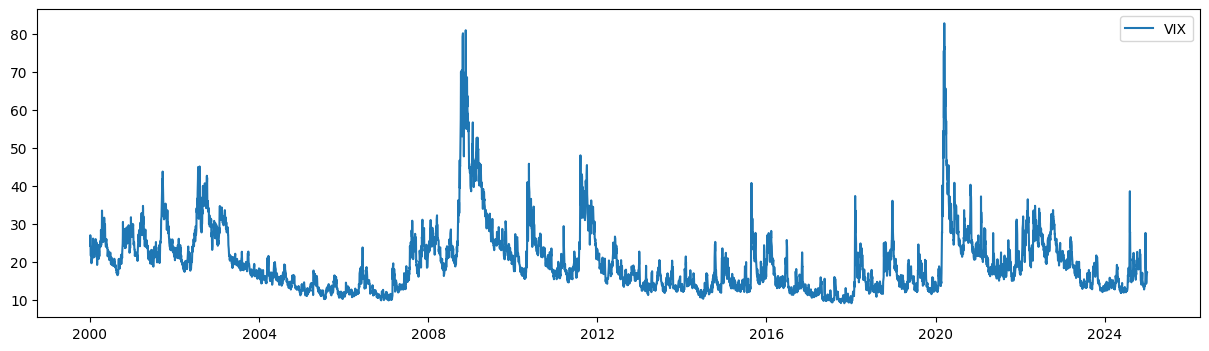

In [88]:
vix = yf.download('^VIX', '2000-01-01', '2025-01-01')
plt.figure(figsize=(15,4))
plt.plot(vix['Close'], label='VIX')
plt.legend()

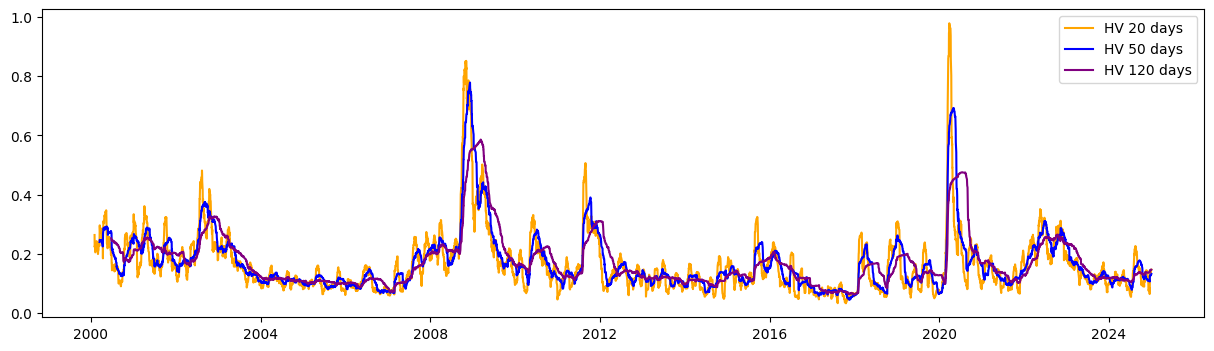

In [89]:
log_returns = np.log(sp500['Close'] / sp500['Close'].shift(1))
hv_20 = log_returns.rolling(window=20).std() * np.sqrt(252)
hv_50 = log_returns.rolling(window=50).std() * np.sqrt(252)
hv_120 = log_returns.rolling(window=120).std() * np.sqrt(252)

plt.figure(figsize=(15,4))
plt.plot(hv_20, label='HV 20 days', color='orange')
plt.plot(hv_50, label='HV 50 days', color='blue')
plt.plot(hv_120, label='HV 120 days', color='purple')
plt.legend()